In [2]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from outlier_cleaner import OutlierCleaner

In [3]:
# Load the CSV file 
df = pd.read_csv('./Students_Grading_Dataset.csv')
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,83.49,C,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,92.29,F,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,93.55,F,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.03,A,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,90.91,A,13.3,Yes,No,Master's,Medium,6,4.5


In [4]:
# Check everything before start
df.shape

(5000, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [6]:
df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,21.048400,75.356076,70.701924,69.546552,74.956320,74.836214,4.996372,74.78305,75.021860,17.521140,5.507200,6.514420
std,1.989786,14.392716,17.436325,17.108996,14.404287,14.423848,2.898978,14.54243,14.323246,7.193035,2.886662,1.446155
min,18.000000,50.010000,40.000000,40.010000,50.000000,50.000000,0.000000,50.00000,50.010000,5.000000,1.000000,4.000000
25%,19.000000,62.945000,55.707500,54.697500,62.340000,62.357500,2.507500,61.97000,62.710000,11.500000,3.000000,5.300000
50%,21.000000,75.670000,70.860000,69.485000,75.090000,74.905000,4.960000,74.54000,75.345000,17.400000,6.000000,6.500000
75%,23.000000,87.862500,85.760000,83.922500,87.352500,87.292500,7.550000,87.63000,87.060000,23.700000,8.000000,7.800000
max,24.000000,100.000000,99.990000,99.980000,99.990000,99.990000,10.000000,100.00000,99.990000,30.000000,10.000000,9.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                   0
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                  0
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1025
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

In [9]:
# so from here we have 1025 missing values

In [10]:
df['Parent_Education_Level'].value_counts()

Parent_Education_Level
Bachelor's     1020
PhD            1012
Master's       1000
High School     943
Name: count, dtype: int64

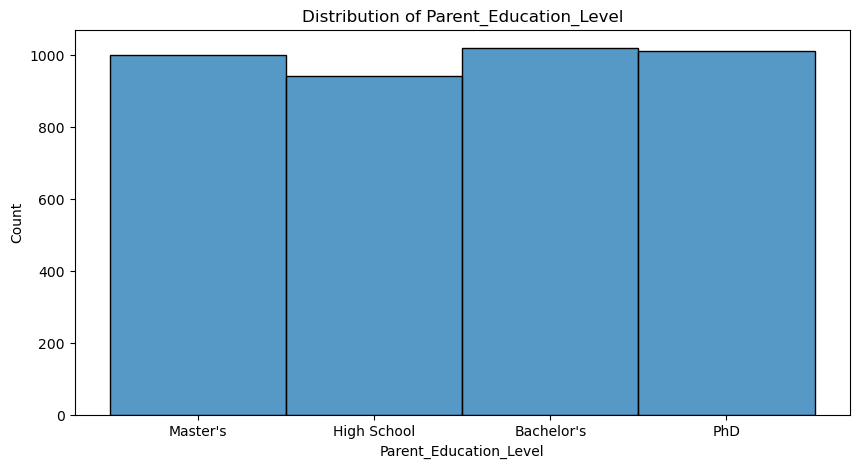

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df['Parent_Education_Level'])
plt.title('Distribution of Parent_Education_Level')
plt.show()

## Exploratory Data Analysis (EDA) - Check distribution, skewness and unique values before encoding

In [126]:
# We do EDA before encoding for better data understanding

## Important cols (Numeric)

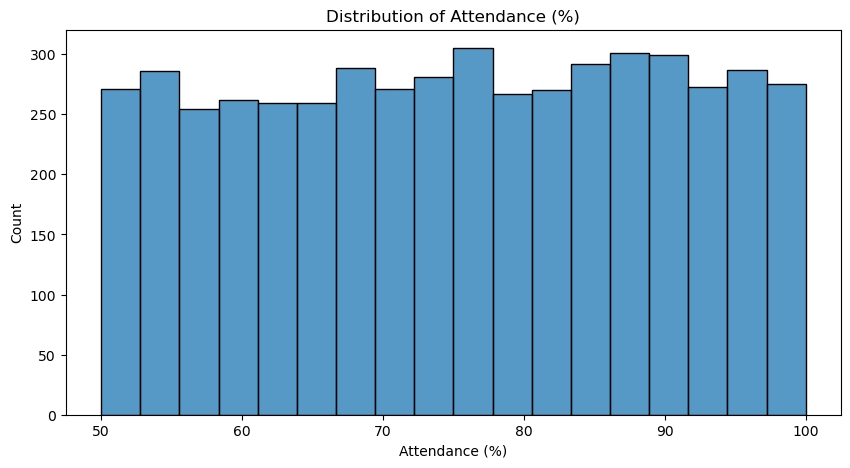

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df['Attendance (%)'])
plt.title('Distribution of Attendance (%)')
plt.xlabel('Attendance (%)')
plt.show()

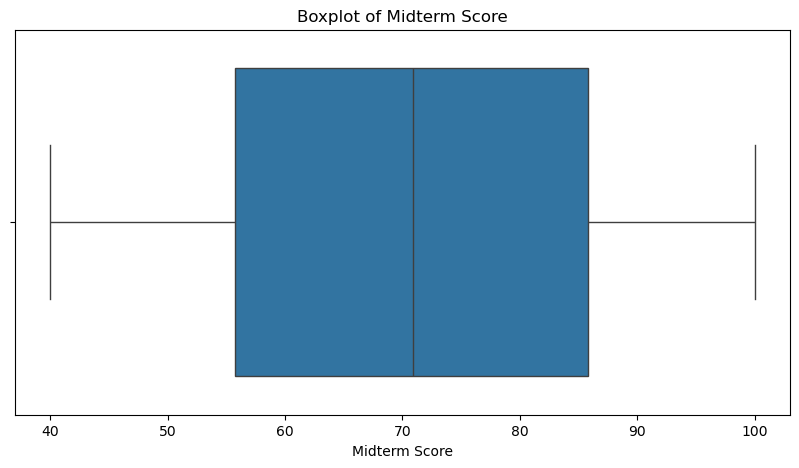

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Midterm_Score'])
plt.title('Boxplot of Midterm Score')
plt.xlabel('Midterm Score')
plt.show()

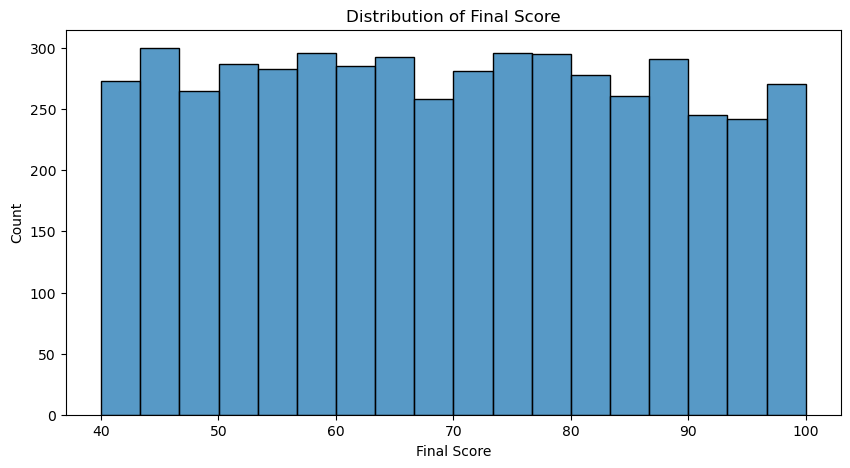

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(df['Final_Score'])
plt.title('Distribution of Final Score')
plt.xlabel('Final Score')
plt.show()

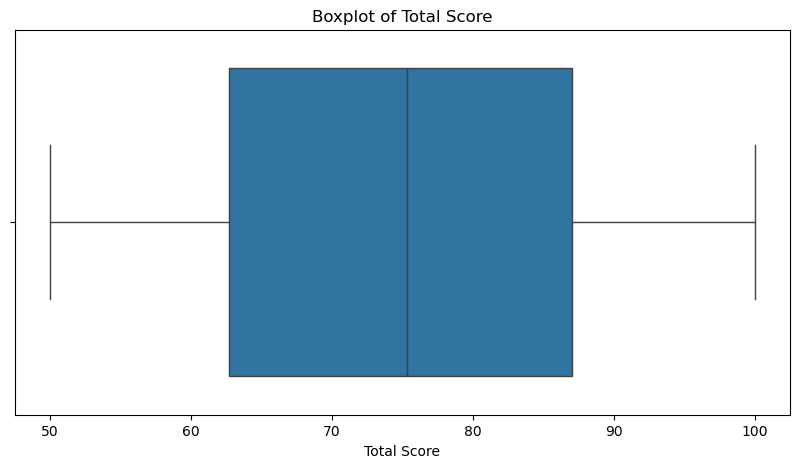

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Total_Score'])
plt.title('Boxplot of Total Score')
plt.xlabel('Total Score')
plt.show()

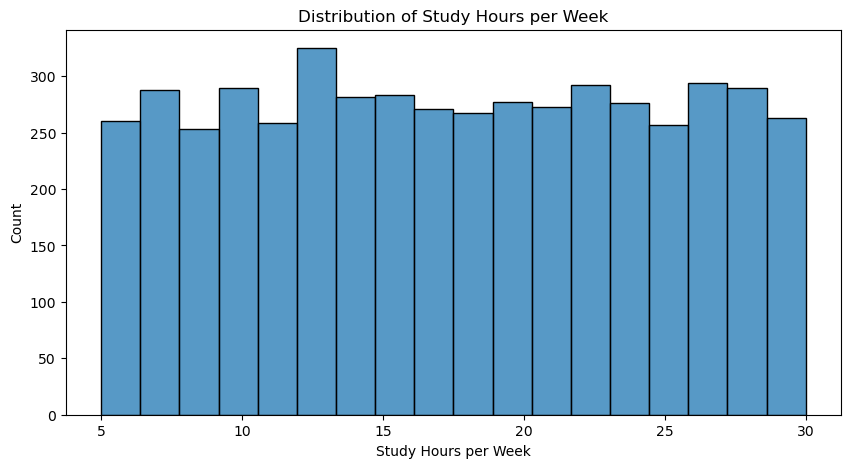

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(df['Study_Hours_per_Week'])
plt.title('Distribution of Study Hours per Week')
plt.xlabel('Study Hours per Week')
plt.show()

## Less important cols (Numeric)

In [20]:
df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

<Figure size 1000x500 with 0 Axes>

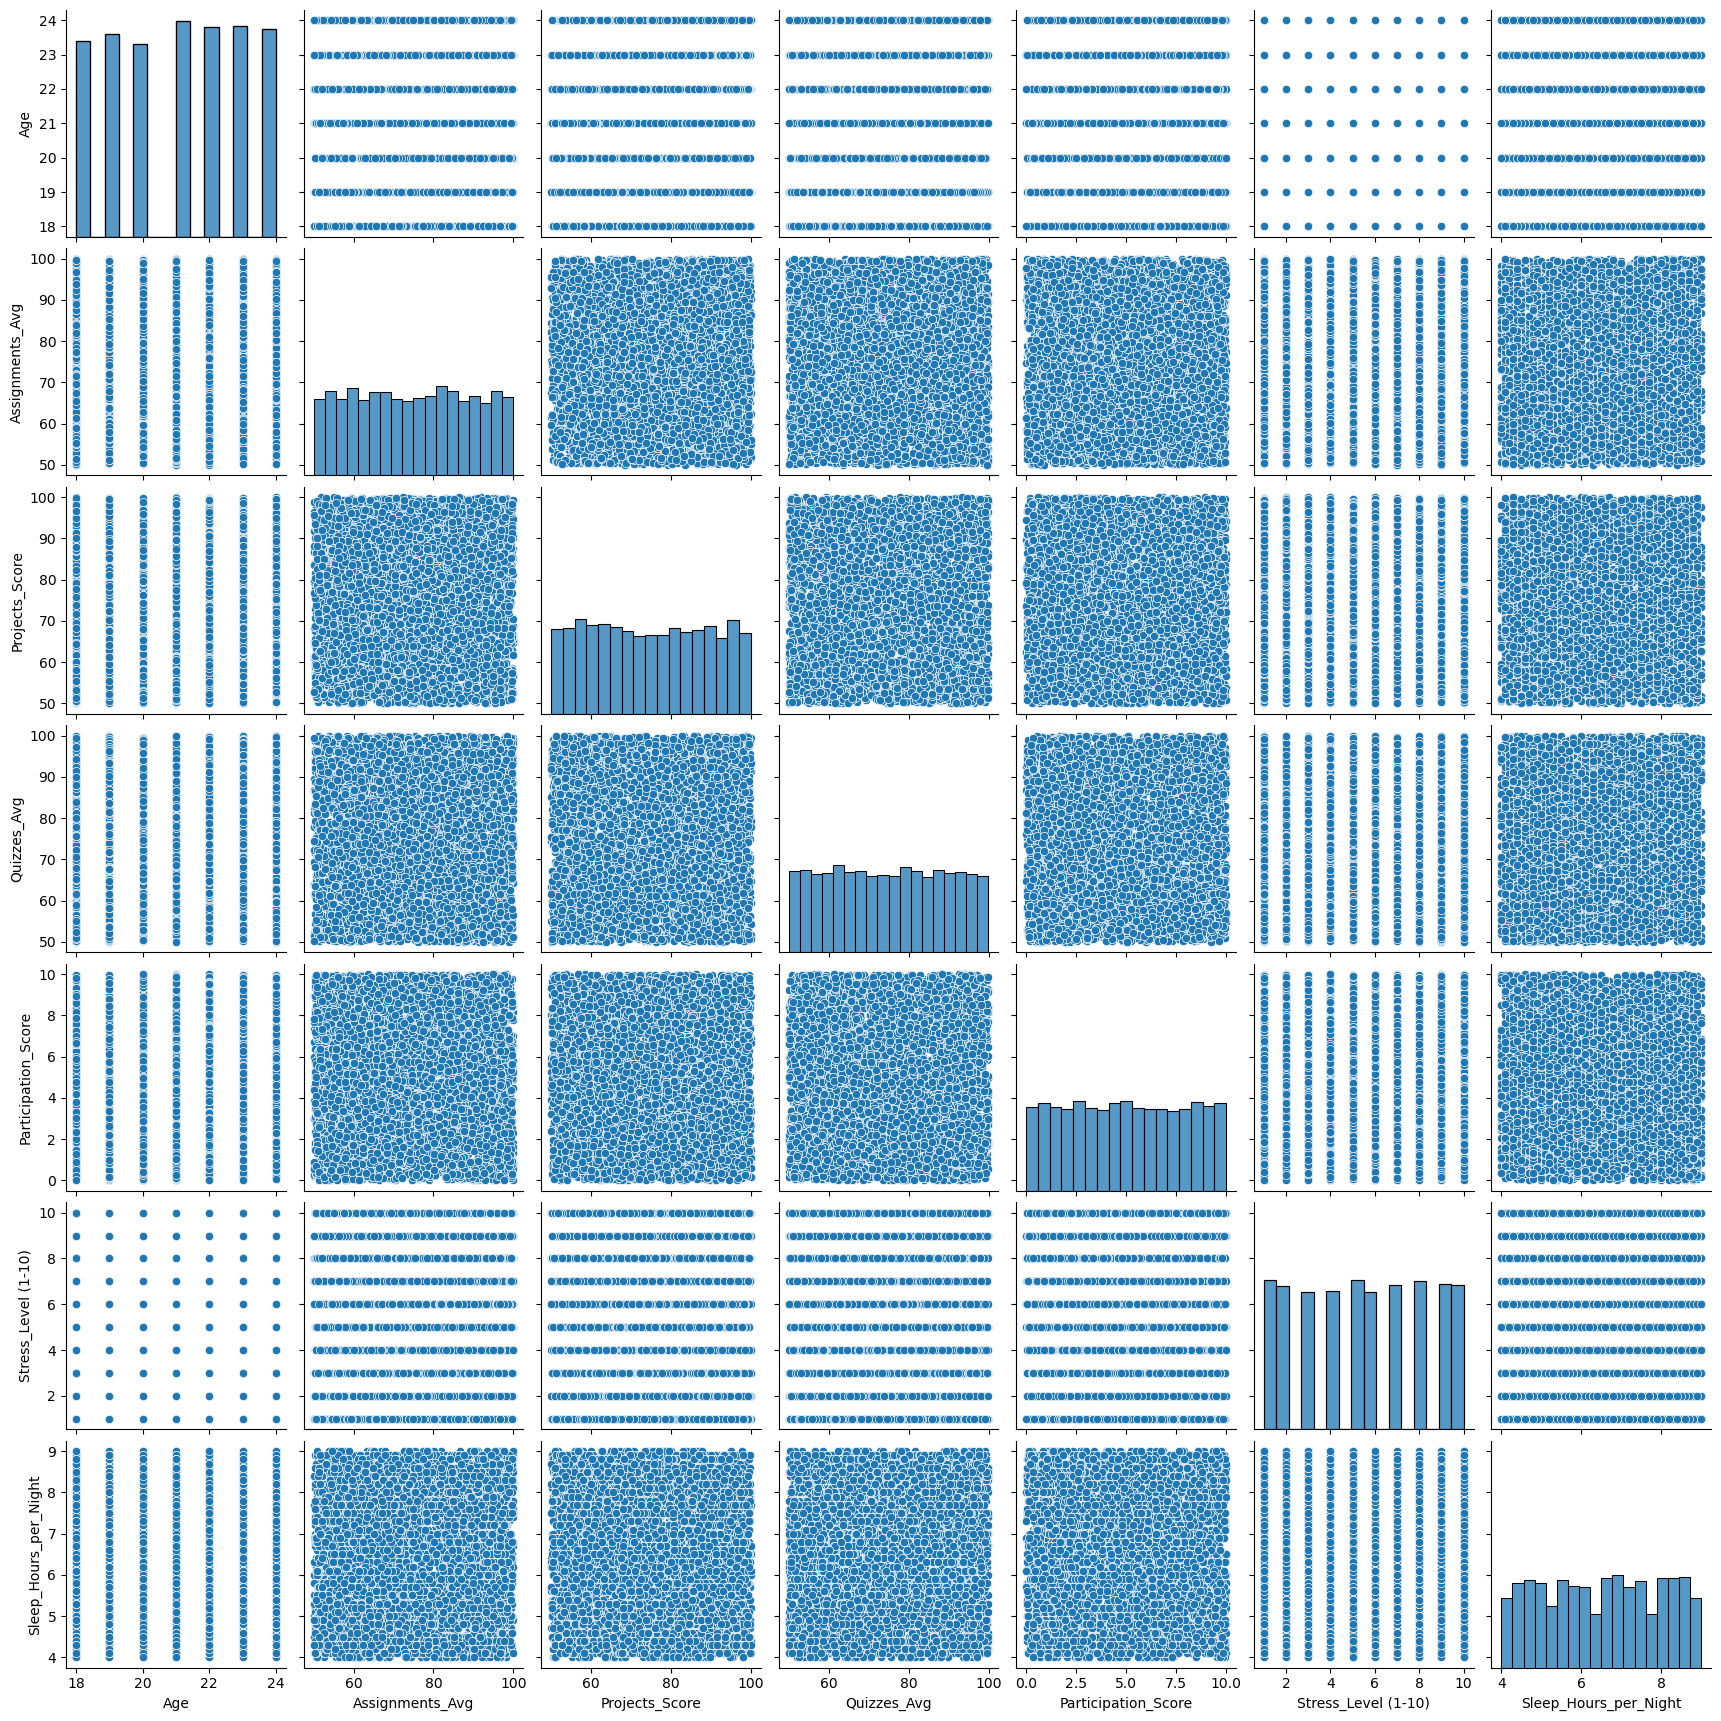

In [21]:
plt.figure(figsize=(10,5))
less_important_cols = [
    'Age',
    'Assignments_Avg',
    'Projects_Score',
    'Quizzes_Avg',
    'Participation_Score',
    'Stress_Level (1-10)',
    'Sleep_Hours_per_Night',
]

sns.pairplot(df[less_important_cols])
plt.show()

## Skewness (Numeric)

In [23]:
numeric_cols = [
    'Age',
    'Attendance (%)',
    'Midterm_Score',
    'Final_Score',
    'Assignments_Avg',
    'Quizzes_Avg',
    'Participation_Score',
    'Projects_Score',
    'Total_Score',
    'Study_Hours_per_Week',
    'Stress_Level (1-10)',
    'Sleep_Hours_per_Night'
]

df[numeric_cols].skew()

Age                     -0.037453
Attendance (%)          -0.043864
Midterm_Score           -0.047498
Final_Score              0.030072
Assignments_Avg          0.005436
Quizzes_Avg              0.011908
Participation_Score      0.013476
Projects_Score           0.029389
Total_Score             -0.028359
Study_Hours_per_Week     0.006258
Stress_Level (1-10)     -0.014923
Sleep_Hours_per_Night   -0.011602
dtype: float64

## Unique value (Categorical)

In [25]:
df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

In [26]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

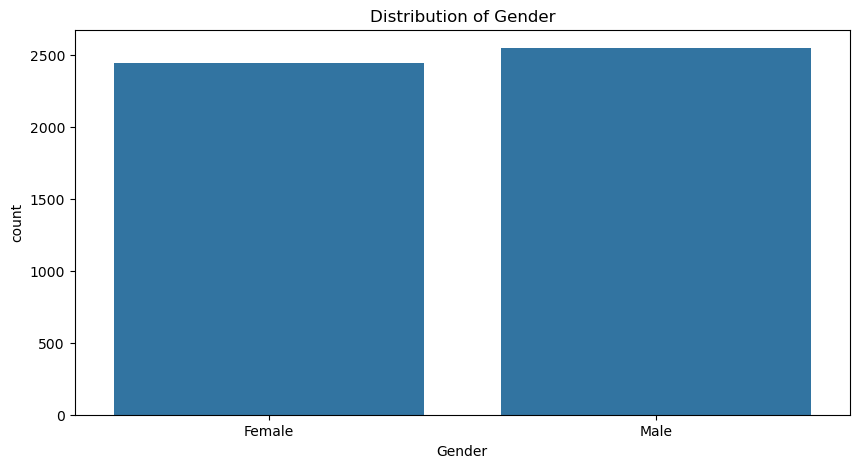

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Gender'])
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.show()

In [28]:
df['Department'].unique()

array(['Mathematics', 'Business', 'Engineering', 'CS'], dtype=object)

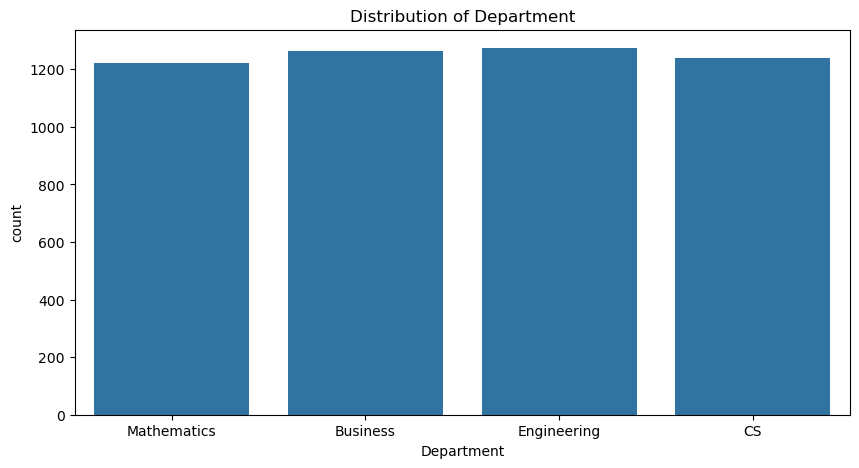

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Department'])
plt.title('Distribution of Department')
plt.xlabel('Department')
plt.show()

In [30]:
df['Grade'].unique()

array(['C', 'F', 'A', 'D', 'B'], dtype=object)

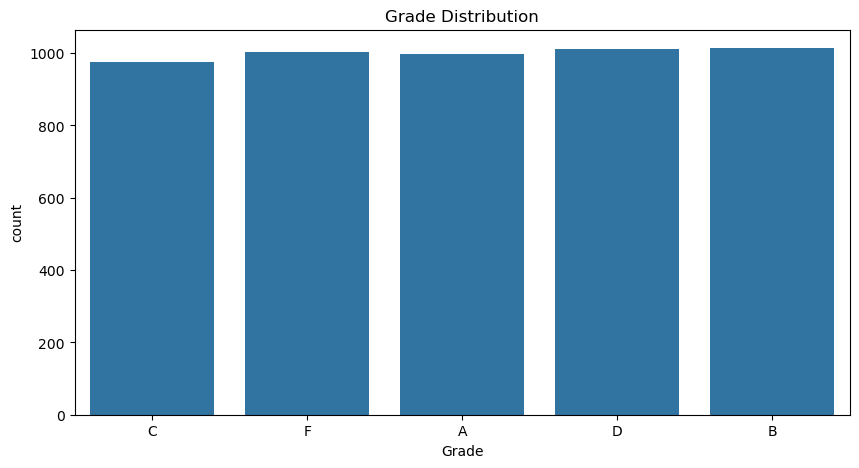

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Grade'])
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.show()

In [32]:
df['Extracurricular_Activities'].unique()

array(['Yes', 'No'], dtype=object)

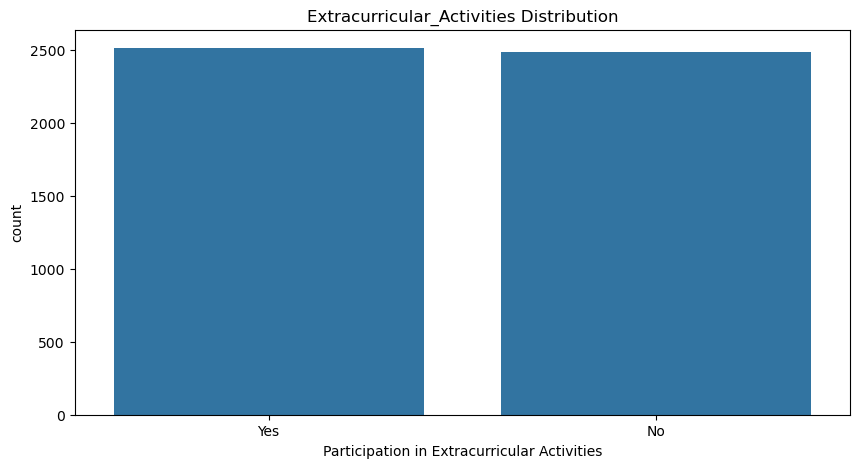

In [33]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Extracurricular_Activities'])
plt.title('Extracurricular_Activities Distribution')
plt.xlabel('Participation in Extracurricular Activities')
plt.show()

In [34]:
df['Internet_Access_at_Home'].unique()

array(['No', 'Yes'], dtype=object)

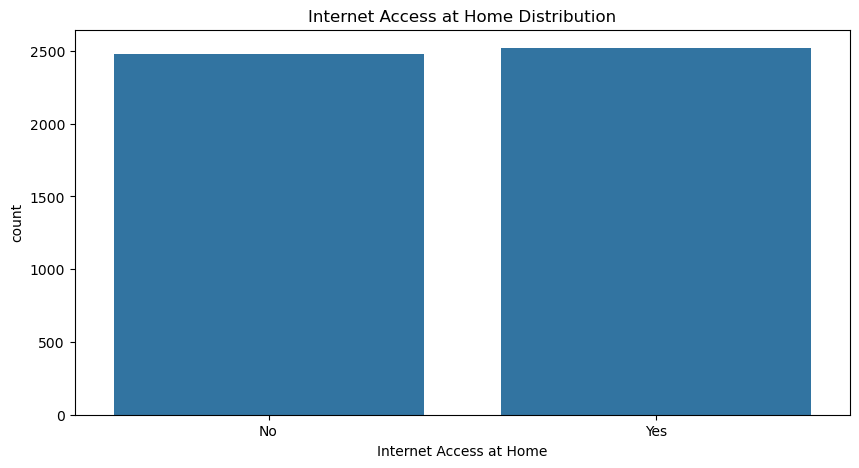

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Internet_Access_at_Home'])
plt.title('Internet Access at Home Distribution')
plt.xlabel('Internet Access at Home')
plt.show()

In [36]:
df['Parent_Education_Level'].unique()

array(["Master's", 'High School', nan, "Bachelor's", 'PhD'], dtype=object)

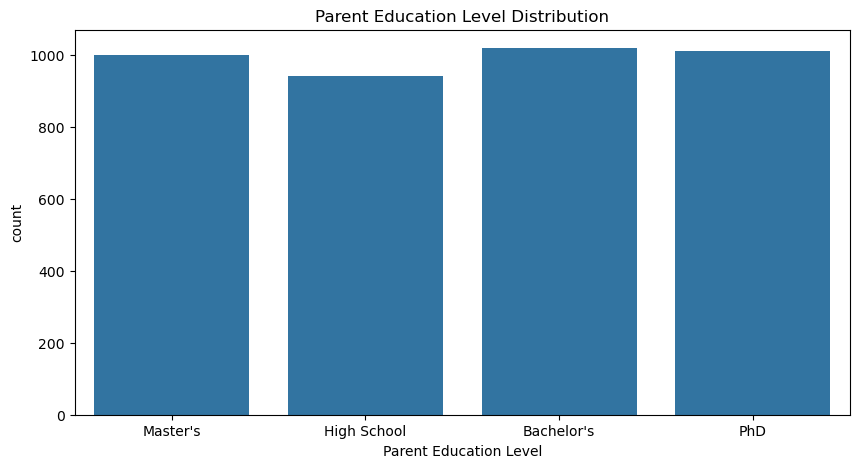

In [37]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Parent_Education_Level'])
plt.title('Parent Education Level Distribution')
plt.xlabel('Parent Education Level')
plt.show()

In [38]:
df['Family_Income_Level'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

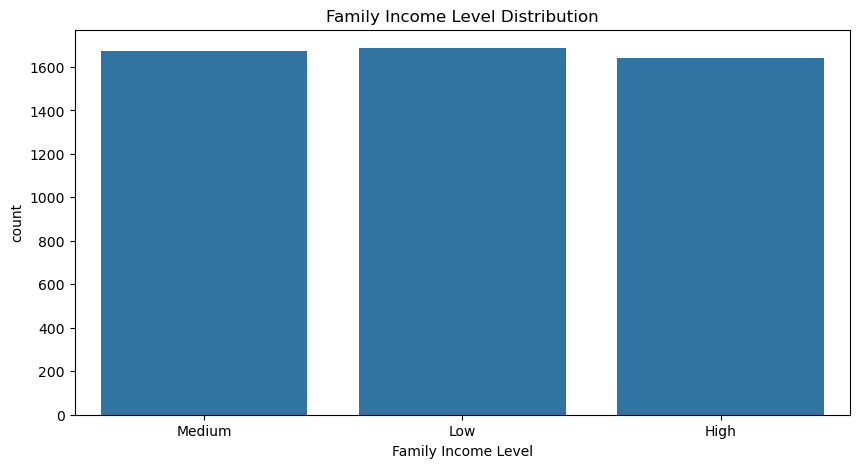

In [39]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Family_Income_Level'])
plt.title('Family Income Level Distribution')
plt.xlabel('Family Income Level')
plt.show()

## Preprocessing

## Replace missing values with unknown

In [42]:
df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

In [43]:
df['Parent_Education_Level'].isnull().sum()

1025

In [44]:
df['Parent_Education_Level'].mode()

0    Bachelor's
Name: Parent_Education_Level, dtype: object

In [45]:
df.loc[df['Parent_Education_Level'].isnull(), 'Parent_Education_Level'] = 'Unknown'
# df.loc[df['Parent_Education_Level'].isnull(), 'Parent_Education_Level'] = 'Bachelor's'

In [46]:
df.isnull().sum()

Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

In [47]:
# what we can do is drop it or replace with the mode / unknown
# if we drop it we will have few data only and the model will be weak
# if replace with random, the model accuracy will bad
# if replace with mode, the model also will be affected
# so best way is replace with unknown for better model

## Map yes/no to 0/1

In [49]:
df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

In [50]:
# Extracurricular_Activities
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})

In [51]:
df['Extracurricular_Activities'].head()

0    1
1    0
2    1
3    0
4    1
Name: Extracurricular_Activities, dtype: int64

In [52]:
# Internet_Access_at_Home
df['Internet_Access_at_Home'] = df['Internet_Access_at_Home'].map({'Yes': 1, 'No': 0})

In [53]:
df['Internet_Access_at_Home'].head()

0    0
1    0
2    0
3    1
4    0
Name: Internet_Access_at_Home, dtype: int64

## Encoding

In [55]:
cleaner = OutlierCleaner(df)
numerical_features = df.select_dtypes(include=['int64', 'float64', 'int32'])
df, info = cleaner.clean_columns(
    columns = numerical_features,
    method = 'zscore',
    show_progress = True
)

Cleaning columns:   0%|          | 14/5000 [00:00<00:07, 694.56it/s]


In [56]:
df

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,83.49,C,10.3,1,0,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,92.29,F,27.1,0,0,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,93.55,F,12.4,1,0,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.03,A,25.5,0,1,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,90.91,A,13.3,1,0,Master's,Medium,6,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,CS,96.09,45.86,45.63,...,51.66,83.60,A,7.8,0,0,Master's,Medium,10,4.5
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Mathematics,96.30,78.67,47.42,...,52.33,50.60,C,24.2,0,1,Unknown,Medium,4,7.2
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,89.94,50.84,65.83,...,97.89,90.32,D,7.6,0,1,Unknown,High,5,6.6
4998,S5998,Sara,Davis,student4998@university.com,Male,23,Engineering,99.09,55.44,57.45,...,84.74,77.35,A,14.5,1,0,PhD,Medium,10,5.9


In [57]:
df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

In [58]:
ordinal_cols = ['Gender', 'Grade']
nominal_cols = ['Department', 'Parent_Education_Level', 'Family_Income_Level']
encoder = LabelEncoder()
encoder_hot = OneHotEncoder(sparse_output=False)
for col in ordinal_cols:
    df[col + '_encoded'] = encoder.fit_transform(df[col])
encoded_data = encoder_hot.fit_transform(df[nominal_cols])
encoded_feature_names = encoder_hot.get_feature_names_out(nominal_cols)
nominal_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)
df2 = pd.concat([df.reset_index(drop=True), nominal_df.reset_index(drop=True)], axis=1)
df2 = df2.drop(columns=['Gender', 'Grade', 'Department', 'Parent_Education_Level', 'Family_Income_Level'])
encoded_df = df2.select_dtypes(include=['int64', 'float64', 'int32'])
encoded_df

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,...,Department_Engineering,Department_Mathematics,Parent_Education_Level_Bachelor's,Parent_Education_Level_High School,Parent_Education_Level_Master's,Parent_Education_Level_PhD,Parent_Education_Level_Unknown,Family_Income_Level_High,Family_Income_Level_Low,Family_Income_Level_Medium
0,22,97.36,40.61,59.61,73.69,53.17,7.34,62.84,83.49,10.3,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,18,97.71,57.27,74.00,74.23,98.23,8.80,98.23,92.29,27.1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,24,99.52,41.84,63.85,85.85,50.00,0.47,91.22,93.55,12.4,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,24,90.38,45.65,44.44,68.10,66.27,0.42,55.48,51.03,25.5,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,23,59.41,53.13,61.77,67.66,83.98,6.43,87.43,90.91,13.3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19,96.09,45.86,45.63,74.13,81.53,0.98,51.66,83.60,7.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4996,19,96.30,78.67,47.42,57.89,85.96,4.78,52.33,50.60,24.2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4997,24,89.94,50.84,65.83,84.69,82.27,0.75,97.89,90.32,7.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,23,99.09,55.44,57.45,78.78,55.96,6.29,84.74,77.35,14.5,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [129]:
df2.head()

,Student_ID,First_Name,Last_Name,Email,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,...,Department_Engineering,Department_Mathematics,Parent_Education_Level_Bachelor's,Parent_Education_Level_High School,Parent_Education_Level_Master's,Parent_Education_Level_PhD,Parent_Education_Level_Unknown,Family_Income_Level_High,Family_Income_Level_Low,Family_Income_Level_Medium
0,S1000,Omar,Williams,student0@university.com,22,97.36,40.61,59.61,73.69,53.17,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,S1001,Maria,Brown,student1@university.com,18,97.71,57.27,74.00,74.23,98.23,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,S1002,Ahmed,Jones,student2@university.com,24,99.52,41.84,63.85,85.85,50.00,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,S1003,Omar,Williams,student3@university.com,24,90.38,45.65,44.44,68.10,66.27,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,S1004,John,Smith,student4@university.com,23,59.41,53.13,61.77,67.66,83.98,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [114]:
df2.shape

(5000, 32)

## Exploratory Data Analysis (EDA) - after encoding

In [179]:
encoded_df.columns

Index(['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Stress_Level (1-10)', 'Sleep_Hours_per_Night', 'Gender_encoded',
       'Grade_encoded', 'Department_Business', 'Department_CS',
       'Department_Engineering', 'Department_Mathematics',
       'Parent_Education_Level_Bachelor's',
       'Parent_Education_Level_High School', 'Parent_Education_Level_Master's',
       'Parent_Education_Level_PhD', 'Parent_Education_Level_Unknown',
       'Family_Income_Level_High', 'Family_Income_Level_Low',
       'Family_Income_Level_Medium'],
      dtype='object')

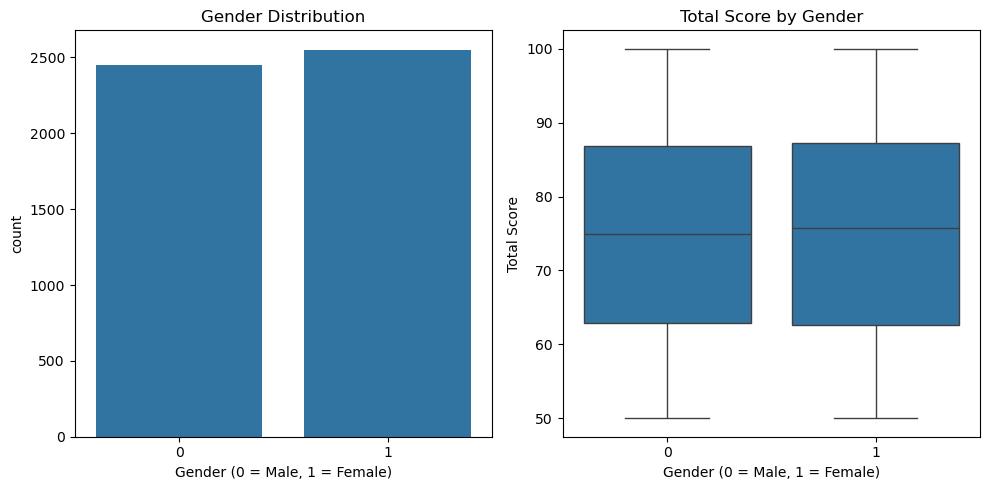

In [219]:
# Gender_encoded
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Gender_encoded', data=encoded_df)
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Gender_encoded', y='Total_Score', data=encoded_df)
plt.title('Total Score by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Total Score')

plt.tight_layout()
plt.show()

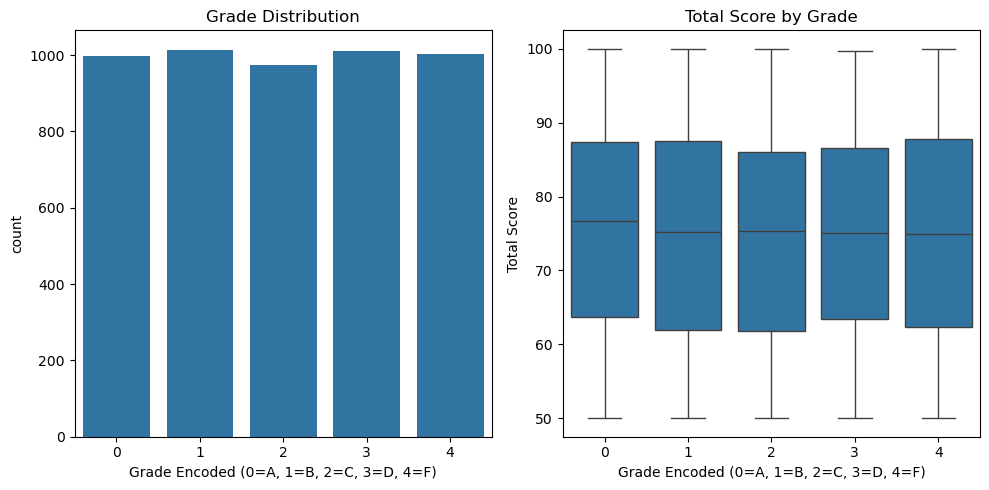

In [221]:
# Grade_encoded
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Grade_encoded', data=encoded_df)
plt.title('Grade Distribution')
plt.xlabel('Grade Encoded (0=A, 1=B, 2=C, 3=D, 4=F)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Grade_encoded', y='Total_Score', data=encoded_df)
plt.title('Total Score by Grade')
plt.xlabel('Grade Encoded (0=A, 1=B, 2=C, 3=D, 4=F)')
plt.ylabel('Total Score')

plt.tight_layout()
plt.show()

In [251]:
encoded_df.columns

Index(['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Stress_Level (1-10)', 'Sleep_Hours_per_Night', 'Gender_encoded',
       'Grade_encoded', 'Department_Business', 'Department_CS',
       'Department_Engineering', 'Department_Mathematics',
       'Parent_Education_Level_Bachelor's',
       'Parent_Education_Level_High School', 'Parent_Education_Level_Master's',
       'Parent_Education_Level_PhD', 'Parent_Education_Level_Unknown',
       'Family_Income_Level_High', 'Family_Income_Level_Low',
       'Family_Income_Level_Medium'],
      dtype='object')

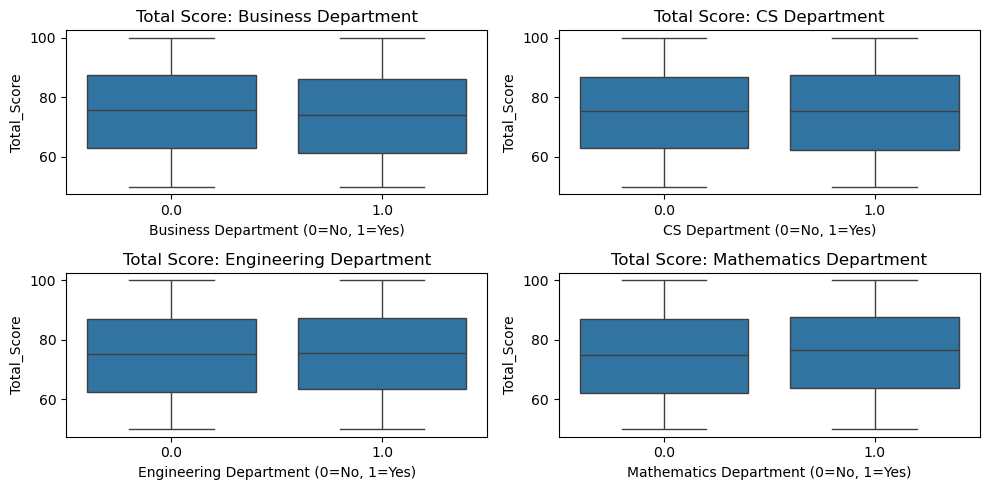

In [231]:
# Department
plt.figure(figsize=(10, 5))

# Business 
plt.subplot(2, 2, 1)
sns.boxplot(x='Department_Business', y='Total_Score', data=encoded_df)
plt.title('Total Score: Business Department')
plt.xlabel('Business Department (0=No, 1=Yes)')

# CS 
plt.subplot(2, 2, 2)
sns.boxplot(x='Department_CS', y='Total_Score', data=encoded_df)
plt.title('Total Score: CS Department')
plt.xlabel('CS Department (0=No, 1=Yes)')

# Engineering
plt.subplot(2, 2, 3)
sns.boxplot(x='Department_Engineering', y='Total_Score', data=encoded_df)
plt.title('Total Score: Engineering Department')
plt.xlabel('Engineering Department (0=No, 1=Yes)')

# Mathematics
plt.subplot(2, 2, 4)
sns.boxplot(x='Department_Mathematics', y='Total_Score', data=encoded_df)
plt.title('Total Score: Mathematics Department')
plt.xlabel('Mathematics Department (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

In [241]:
encoded_df.columns

Index(['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Stress_Level (1-10)', 'Sleep_Hours_per_Night', 'Gender_encoded',
       'Grade_encoded', 'Department_Business', 'Department_CS',
       'Department_Engineering', 'Department_Mathematics',
       'Parent_Education_Level_Bachelor's',
       'Parent_Education_Level_High School', 'Parent_Education_Level_Master's',
       'Parent_Education_Level_PhD', 'Parent_Education_Level_Unknown',
       'Family_Income_Level_High', 'Family_Income_Level_Low',
       'Family_Income_Level_Medium'],
      dtype='object')

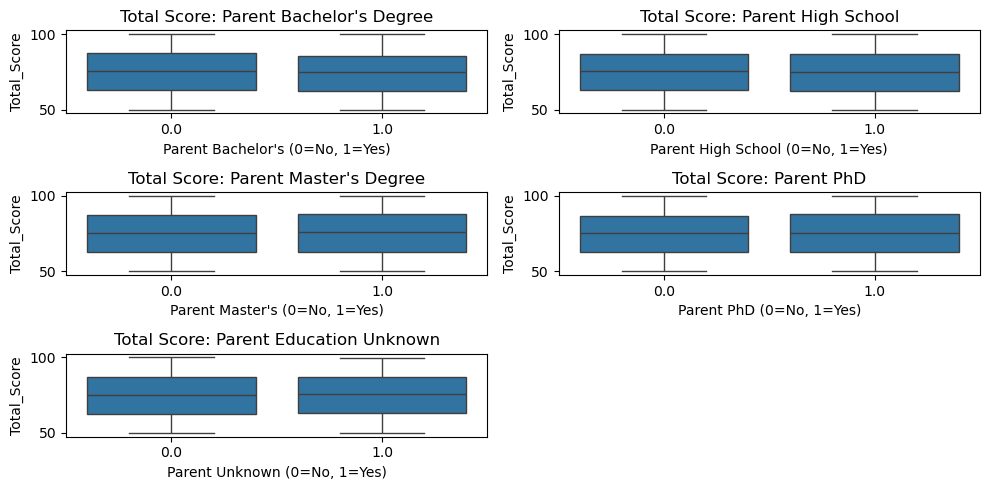

In [245]:
# Parent_Education_Level 
plt.figure(figsize=(10, 5))

# Bachelor's Degree
plt.subplot(3, 2, 1)
sns.boxplot(x="Parent_Education_Level_Bachelor's", y='Total_Score', data=encoded_df)
plt.title("Total Score: Parent Bachelor's Degree")
plt.xlabel("Parent Bachelor's (0=No, 1=Yes)")

# High School
plt.subplot(3, 2, 2)
sns.boxplot(x='Parent_Education_Level_High School', y='Total_Score', data=encoded_df)
plt.title('Total Score: Parent High School')
plt.xlabel('Parent High School (0=No, 1=Yes)')

# Master’s Degree
plt.subplot(3, 2, 3)
sns.boxplot(x="Parent_Education_Level_Master's", y='Total_Score', data=encoded_df)
plt.title("Total Score: Parent Master's Degree")
plt.xlabel("Parent Master's (0=No, 1=Yes)")

# PhD
plt.subplot(3, 2, 4)
sns.boxplot(x='Parent_Education_Level_PhD', y='Total_Score', data=encoded_df)
plt.title('Total Score: Parent PhD')
plt.xlabel('Parent PhD (0=No, 1=Yes)')

# Unknown
plt.subplot(3, 2, 5)
sns.boxplot(x='Parent_Education_Level_Unknown', y='Total_Score', data=encoded_df)
plt.title('Total Score: Parent Education Unknown')
plt.xlabel('Parent Unknown (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

In [249]:
encoded_df.columns

Index(['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Stress_Level (1-10)', 'Sleep_Hours_per_Night', 'Gender_encoded',
       'Grade_encoded', 'Department_Business', 'Department_CS',
       'Department_Engineering', 'Department_Mathematics',
       'Parent_Education_Level_Bachelor's',
       'Parent_Education_Level_High School', 'Parent_Education_Level_Master's',
       'Parent_Education_Level_PhD', 'Parent_Education_Level_Unknown',
       'Family_Income_Level_High', 'Family_Income_Level_Low',
       'Family_Income_Level_Medium'],
      dtype='object')

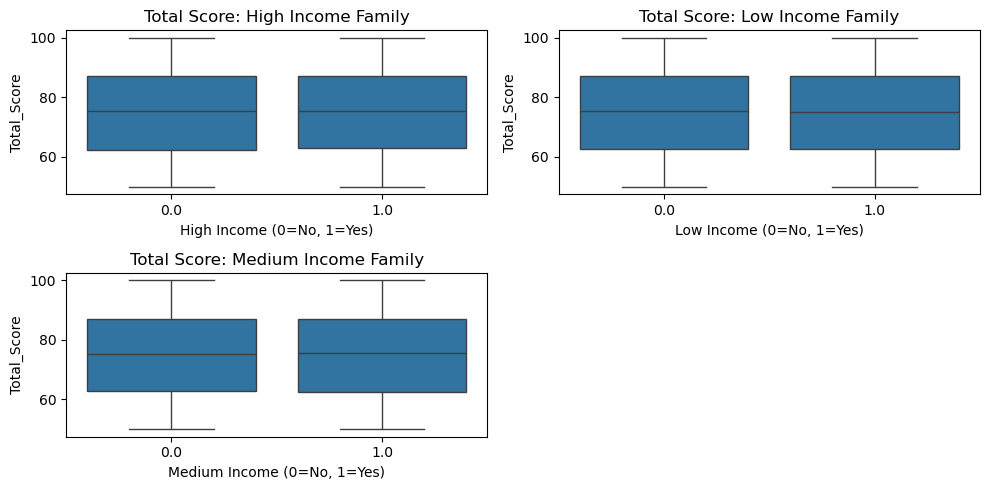

In [247]:
# Family_Income_Level
plt.figure(figsize=(10, 5))

# High Income
plt.subplot(2, 2, 1)
sns.boxplot(x='Family_Income_Level_High', y='Total_Score', data=encoded_df)
plt.title('Total Score: High Income Family')
plt.xlabel('High Income (0=No, 1=Yes)')

# Low Income
plt.subplot(2, 2, 2)
sns.boxplot(x='Family_Income_Level_Low', y='Total_Score', data=encoded_df)
plt.title('Total Score: Low Income Family')
plt.xlabel('Low Income (0=No, 1=Yes)')

# Medium Income
plt.subplot(2, 2, 3)
sns.boxplot(x='Family_Income_Level_Medium', y='Total_Score', data=encoded_df)
plt.title('Total Score: Medium Income Family')
plt.xlabel('Medium Income (0=No, 1=Yes)')

plt.tight_layout()
plt.show()